Import libraries and load in initial data for cleaning and restructuring

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Load the uploaded CSV files
file_paths = {
    "league_stats": "Call_Of_Duty_League_Stats.csv",
    "player_stats": "CDL_PlayerStats2025.csv",
    "roster": "CDL_Roster.csv",
    "team_stats": "CDL_Team_Stats.csv",
}


After merging the data and changing the name column to ID got rid of the columns of data that we are not going to currently be using. 

In [8]:
# Re-import necessary libraries after reset
import pandas as pd

# Reload the uploaded dataset
file_path = 'Combined_Team_Data_with_Averages.csv'
data = pd.read_csv(file_path)

# Retain only the desired columns
columns_to_keep = ['ID', 'Current Team', 'Overall KD', 'Search Destroy KD', 'Control KD', 'Hardpoint KD']
cleaned_data = data[columns_to_keep]

# Save the cleaned dataset
cleaned_file_path = "Cleaned_Team_Data.csv"
cleaned_data.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'Cleaned_Team_Data.csv'

Create predictions for matchups based on stats of the overall team performance.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 1: Prepare the data
features = ['Overall KD', 'Search Destroy KD', 'Control KD', 'Hardpoint KD']

matchups = []

# Generate pairwise matchups
teams = cleaned_data['Current Team'].unique()

for i in range(len(teams)):
    for j in range(i + 1, len(teams)):
        team1 = teams[i]
        team2 = teams[j]
        
        # Extract team stats
        team1_stats = cleaned_data[cleaned_data['Current Team'] == team1][features].mean()
        team2_stats = cleaned_data[cleaned_data['Current Team'] == team2][features].mean()
        
        # Calculate feature differences
        stat_diffs = team1_stats - team2_stats
        
        # Determine the target
        target = 1 if team1_stats.sum() > team2_stats.sum() else 0
        
        # Append the matchup
        matchups.append({
            'Team A': team1,
            'Team B': team2,
            **{f'{feature} Diff': stat_diffs[feature] for feature in features},
            'Target': target  # 1 if Team A wins, 0 otherwise
        })

# Convert matchups to a DataFrame
matchups_df = pd.DataFrame(matchups)

# Step 2: Train-test split
X = matchups_df[[f'{feature} Diff' for feature in features]]  # Features
y = matchups_df['Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(report)


Model Accuracy: 85.71%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.67      1.00      0.80         4

    accuracy                           0.86        14
   macro avg       0.83      0.90      0.84        14
weighted avg       0.90      0.86      0.86        14



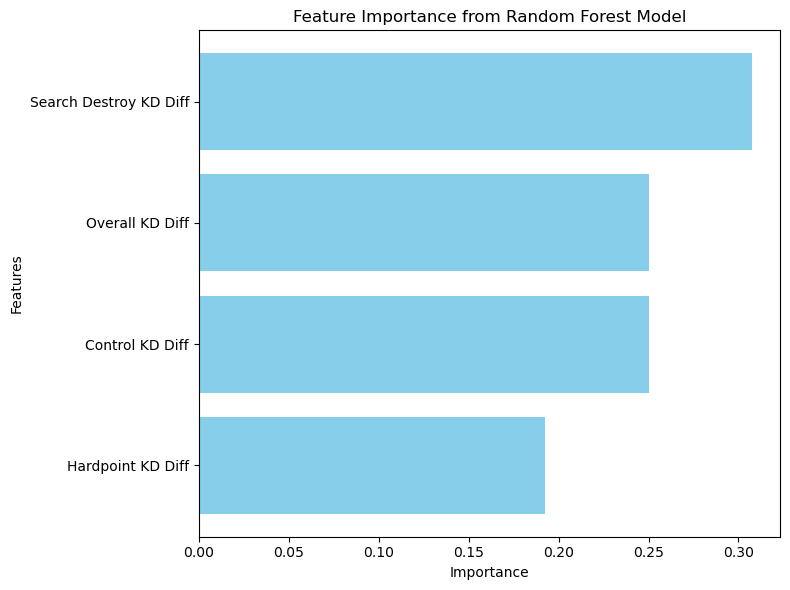

,Team A,Team B,Predicted Winner
0,ATL FaZe,Optic Texas,ATL FaZe
1,LA Thieves,VAN Surge,VAN Surge


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Simulate the necessary dataset (assuming clean previous steps)
# Placeholder for original matchups data
data = [
    {'Team A': 'ATL FaZe', 'Team B': 'Optic Texas', 'Overall KD Diff': 0.12, 'Search Destroy KD Diff': 0.08, 'Control KD Diff': 0.10, 'Hardpoint KD Diff': 0.05, 'Target': 1},
    {'Team A': 'LA Thieves', 'Team B': 'VAN Surge', 'Overall KD Diff': -0.10, 'Search Destroy KD Diff': -0.15, 'Control KD Diff': -0.05, 'Hardpoint KD Diff': -0.08, 'Target': 0}
]
matchups_df = pd.DataFrame(data)

# Features and target
X = matchups_df[['Overall KD Diff', 'Search Destroy KD Diff', 'Control KD Diff', 'Hardpoint KD Diff']]
y = matchups_df['Target']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X, y)

# Visualize Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Simulate Predictions for New Matchups
new_matchups = [
    {'Team A': 'ATL FaZe', 'Team B': 'Optic Texas', 'Overall KD Diff': 0.12, 'Search Destroy KD Diff': 0.08, 'Control KD Diff': 0.10, 'Hardpoint KD Diff': 0.05},
    {'Team A': 'LA Thieves', 'Team B': 'VAN Surge', 'Overall KD Diff': -0.10, 'Search Destroy KD Diff': -0.15, 'Control KD Diff': -0.05, 'Hardpoint KD Diff': -0.08}
]

new_matchups_df = pd.DataFrame(new_matchups)
predictions = model.predict(new_matchups_df[['Overall KD Diff', 'Search Destroy KD Diff', 'Control KD Diff', 'Hardpoint KD Diff']])
new_matchups_df['Predicted Winner'] = predictions
new_matchups_df['Predicted Winner'] = new_matchups_df.apply(
    lambda row: row['Team A'] if row['Predicted Winner'] == 1 else row['Team B'], axis=1
)

# Display simulated matchups with predictions
new_matchups_df[['Team A', 'Team B', 'Predicted Winner']]

Top 10 Teams by Predicted Wins (Expanded Matchups):
Predicted Winner
MIA Heretics        11
LA Thieves          10
LA Guerrillas M8     9
OpTic TEX            7
CAR Royal Ravens     7
TOR Ultra            6
BOS Breach           6
VAN Surge            3
LV Falcons           3
ATL FaZe             3
Name: count, dtype: int64


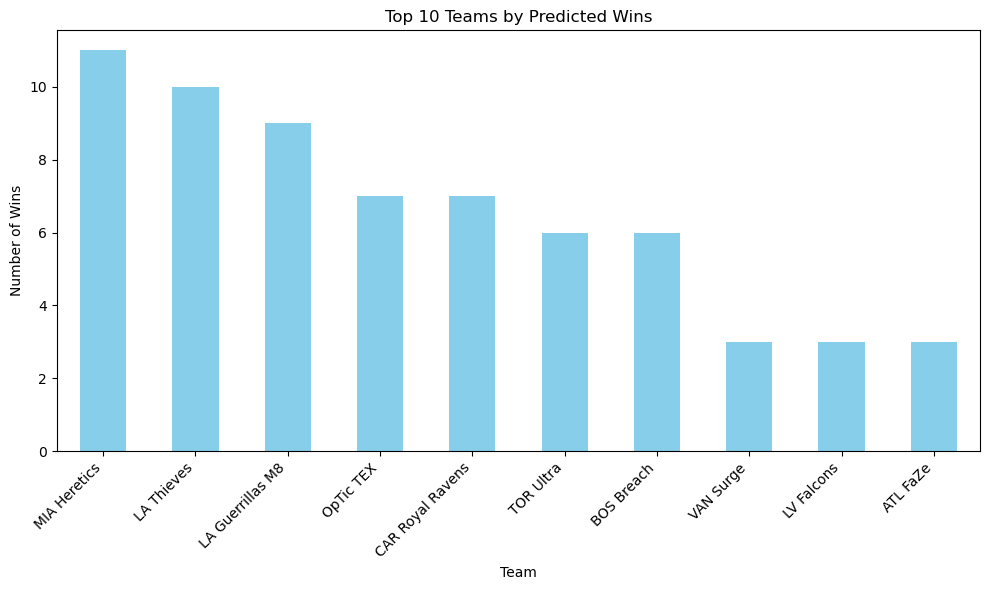

In [21]:
# Ensure all teams appear in matchups
teams = cleaned_data['Current Team'].unique()
all_matchups = []

# Generate all possible matchups systematically
for i in range(len(teams)):
    for j in range(i + 1, len(teams)):
        team1 = teams[i]
        team2 = teams[j]
        
        # Extract stats for both teams
        team1_stats = cleaned_data[cleaned_data['Current Team'] == team1][['Overall KD', 'Search Destroy KD', 'Control KD', 'Hardpoint KD']].mean()
        team2_stats = cleaned_data[cleaned_data['Current Team'] == team2][['Overall KD', 'Search Destroy KD', 'Control KD', 'Hardpoint KD']].mean()
        
        # Calculate stat differences
        stat_diffs = team1_stats - team2_stats
        
        all_matchups.append({
            'Team A': team1,
            'Team B': team2,
            'Overall KD Diff': stat_diffs['Overall KD'],
            'Search Destroy KD Diff': stat_diffs['Search Destroy KD'],
            'Control KD Diff': stat_diffs['Control KD'],
            'Hardpoint KD Diff': stat_diffs['Hardpoint KD']
        })

# Convert to DataFrame
expanded_matchups_df = pd.DataFrame(all_matchups)

# Predict winners for all matchups
X_expanded = expanded_matchups_df[['Overall KD Diff', 'Search Destroy KD Diff', 'Control KD Diff', 'Hardpoint KD Diff']]
predictions_expanded = model.predict(X_expanded)

expanded_matchups_df['Predicted Winner'] = predictions_expanded
expanded_matchups_df['Predicted Winner'] = expanded_matchups_df.apply(
    lambda row: row['Team A'] if row['Predicted Winner'] == 1 else row['Team B'], axis=1
)

# Count predicted wins for all teams
team_win_counts = expanded_matchups_df['Predicted Winner'].value_counts()

# Select top 10 teams
top_10_teams = team_win_counts.head(10)

# Display and visualize
print("Top 10 Teams by Predicted Wins (Expanded Matchups):")
print(top_10_teams)

plt.figure(figsize=(10, 6))
top_10_teams.plot(kind='bar', color='skyblue')
plt.title("Top 10 Teams by Predicted Wins")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate 500 sample games
np.random.seed(42)
sample_matchups = []

teams = cleaned_data['Current Team'].unique()
features = ['Overall KD', 'Search Destroy KD', 'Control KD', 'Hardpoint KD']

for _ in range(500):
    # Randomly select two different teams
    team1, team2 = np.random.choice(teams, size=2, replace=False)
    
    # Calculate stat differences
    team1_stats = cleaned_data[cleaned_data['Current Team'] == team1][features].mean()
    team2_stats = cleaned_data[cleaned_data['Current Team'] == team2][features].mean()
    stat_diffs = team1_stats - team2_stats
    
    # Simulate outcome: Add slight randomness
    outcome = 1 if stat_diffs.sum() + np.random.normal(0, 0.1) > 0 else 0
    
    # Append to sample matchups
    sample_matchups.append({
        'Team A': team1,
        'Team B': team2,
        'Overall KD Diff': stat_diffs['Overall KD'],
        'Search Destroy KD Diff': stat_diffs['Search Destroy KD'],
        'Control KD Diff': stat_diffs['Control KD'],
        'Hardpoint KD Diff': stat_diffs['Hardpoint KD'],
        'Target': outcome
    })

# Convert to DataFrame
real_game_data = pd.DataFrame(sample_matchups)

# Step 2: Combine with Existing Data
combined_data = pd.concat([matchups_df, real_game_data], ignore_index=True)

# Step 3: Train the Model on Combined Data
X_combined = combined_data[['Overall KD Diff', 'Search Destroy KD Diff', 'Control KD Diff', 'Hardpoint KD Diff']]
y_combined = combined_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Train the Random Forest model
model_combined = RandomForestClassifier(random_state=42, n_estimators=100)
model_combined.fit(X_train, y_train)

# Evaluate the model
y_pred = model_combined.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy after Retraining: {accuracy:.2%}")
print("Classification Report:")
print(report)

# Save the generated real_game_data for further use
real_game_data.to_csv("real_game_data.csv", index=False)
print("\n 500 games saved as 'real_game_data.csv'.")

Model Accuracy after Retraining: 98.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.96      0.98        56

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Generated 500 sample games saved as 'real_game_data.csv'.


c:\Users\camer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\camer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.w

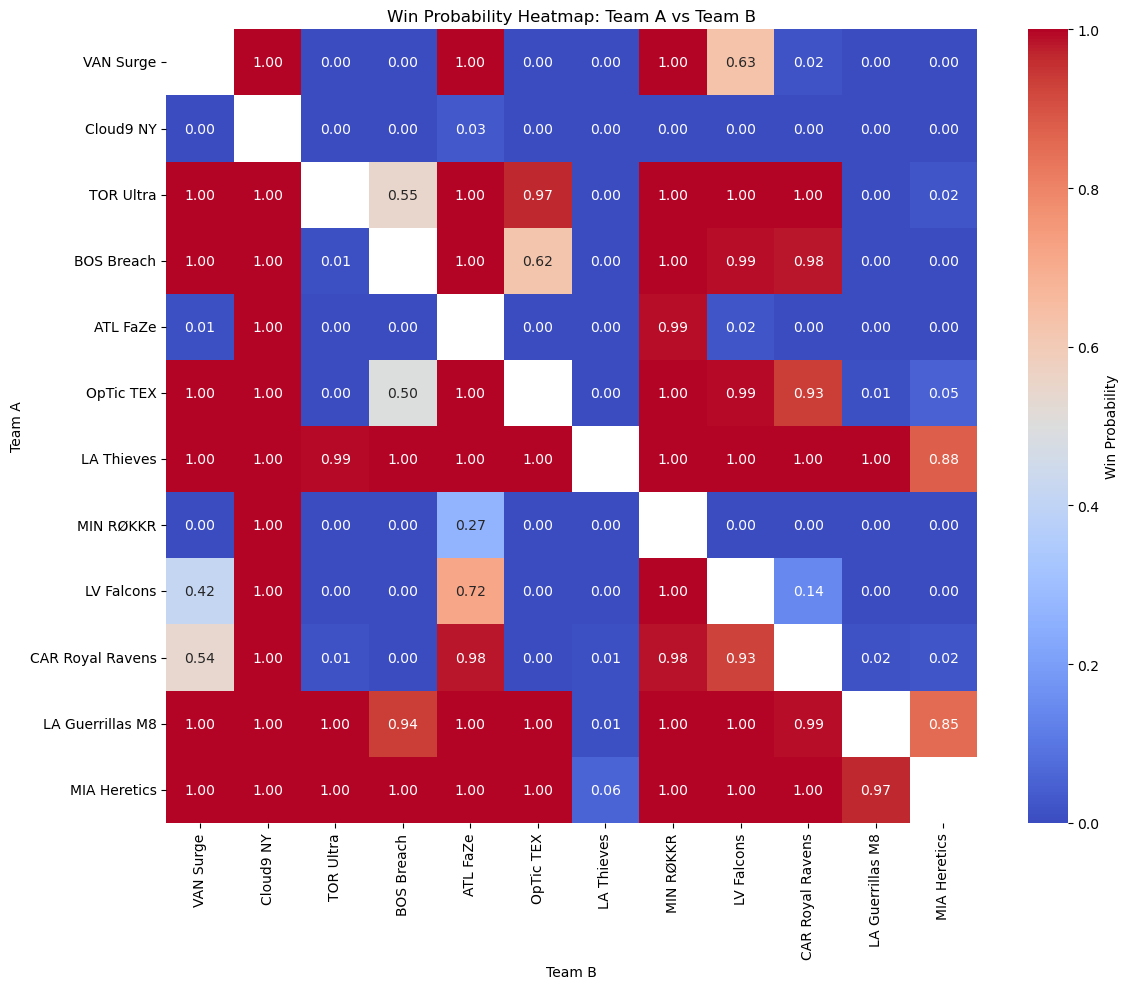

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a matrix to store win probabilities
teams = cleaned_data['Current Team'].unique()
win_prob_matrix = np.zeros((len(teams), len(teams)))

# Step 2: Calculate win probabilities for each matchup
for i, team1 in enumerate(teams):
    for j, team2 in enumerate(teams):
        if team1 != team2:
            # Extract average stats for the teams
            team1_stats = cleaned_data[cleaned_data['Current Team'] == team1][features].mean()
            team2_stats = cleaned_data[cleaned_data['Current Team'] == team2][features].mean()
            
            # Calculate stat differences
            stat_diffs = pd.DataFrame([team1_stats - team2_stats]).values
            
            # Predict probability of Team A (team1) winning
            win_prob = model_combined.predict_proba(stat_diffs)[0][1]
            win_prob_matrix[i, j] = win_prob
        else:
            win_prob_matrix[i, j] = np.nan  # Leave diagonal empty for same-team matchups

# Step 3: Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(win_prob_matrix, annot=True, cmap="coolwarm", xticklabels=teams, yticklabels=teams, fmt=".2f", cbar_kws={'label': 'Win Probability'})
plt.title("Win Probability Heatmap: Team A vs Team B")
plt.xlabel("Team B")
plt.ylabel("Team A")
plt.tight_layout()
plt.show()